In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [17]:
img = cv2.imread("nature-desktop-background-1691.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape = img.shape
print(img.shape)

(760, 1140, 3)


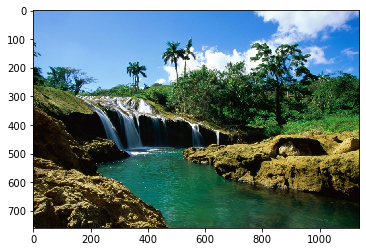

In [4]:
plt.imshow(img)
plt.show()

In [5]:
#Flatten the image for each channel
all_pixels = img.reshape((-1,3))
print(all_pixels.shape)


(866400, 3)


In [6]:
from sklearn.cluster import KMeans
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centres = km.cluster_centers_

In [8]:
print(centres,type(centres))

[[ 21.04226508  25.83127461  11.98955059]
 [128.53782761 180.10318643 233.46368565]
 [ 50.95021005  92.20344203  62.13781517]
 [156.97153272 149.94668894  89.54687771]] <class 'numpy.ndarray'>


In [9]:
centres = centres.astype('uint8')         #converting them from float to 8 bit unsigned intergers since we want to map them in range of 0-255

In [10]:
print(centres)        #they are RGB values 

[[ 21  25  11]
 [128 180 233]
 [ 50  92  62]
 [156 149  89]]


# Plot what all colors are these?

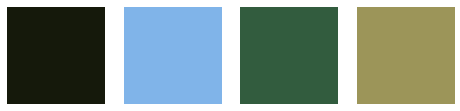

In [11]:
i =1
plt.figure(0,figsize = (8,2))

colors = []
for each_color in centres:
    plt.subplot(1,4,i)
    plt.axis("off")
    i +=1 
    
    colors.append(each_color)
    
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:] = each_color
    plt.imshow(a)
    
plt.show()

# Segmenting Our Original Image

In [13]:
new_img = np.zeros((760*1140,3),dtype = 'uint8')
print(new_img.shape)

(866400, 3)


In [14]:
colors

[array([21, 25, 11], dtype=uint8),
 array([128, 180, 233], dtype=uint8),
 array([50, 92, 62], dtype=uint8),
 array([156, 149,  89], dtype=uint8)]

In [16]:
km.labels_

array([1, 1, 1, ..., 0, 0, 0])

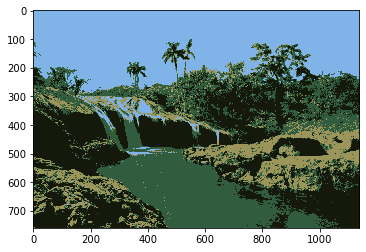

In [19]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()